In [ ]:
import pandas as pd

In [ ]:
#Google drive dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data** can be found at: https://www.kaggle.com/code/ilialar/california-housing-analysis-and-preciction/data?select=housing.csv

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Public Datasets/housing.csv')
# check data
print(dataset.shape)
dataset.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Dealing with missing values

In [ ]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
dataset = dataset.dropna()
print(dataset.shape)

(20433, 10)


# Dropping Duplicate Data

In [ ]:
dataset = dataset.drop_duplicates()
print(dataset.shape)

(20433, 10)


# Label Encoding

Encode colmun labels with value between 0 and n_classes-1. You should always **avoid it** and use One-Hot Encoding instead.
This transformer should be used to encode target values, i.e. y, and not the input X.

In [ ]:
dataset['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

dataset['ocean_proximity_Encoded'] = label_encoder.fit_transform(dataset['ocean_proximity'])
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_Encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


# One-Hot Encoding

Transforming categorical feature into several binary ones.

In [ ]:
OHE_Ocean_Proximity = pd.get_dummies(dataset['ocean_proximity'])
OHE_Ocean_Proximity.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:
dataset = pd.concat([dataset, OHE_Ocean_Proximity], axis=1)
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_Encoded,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,0,0,0,1,0


In [ ]:
dataset.drop(['ocean_proximity','ocean_proximity_Encoded'], inplace=True, axis=1)
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


# Make a histogram of the DataFrame’s columns.

A histogram is a representation of the distribution of data. This function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column. [More Info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)

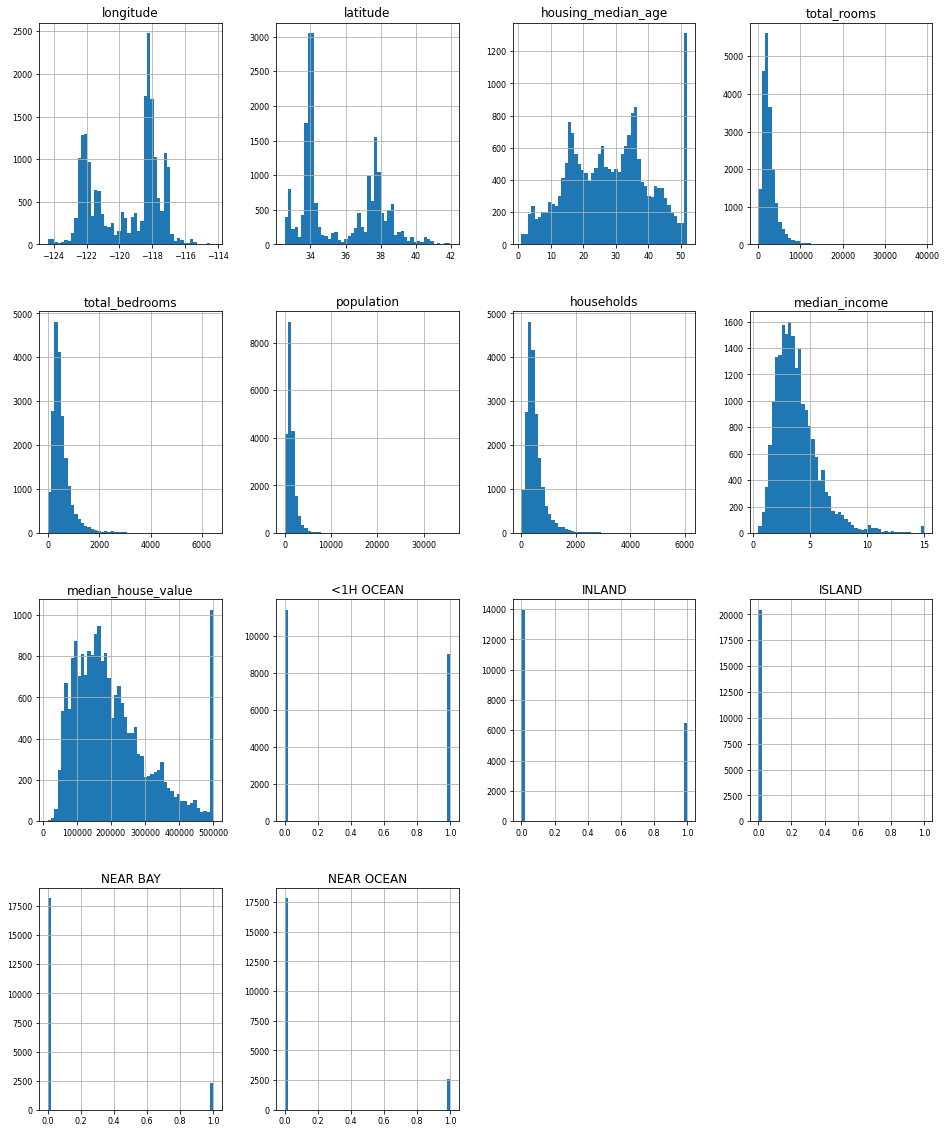

In [ ]:
# Plot a histogram of the DataFrame’s columns
dataset.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Normalization

Normalization (or min-max normalization) scale all values in a fixed range between 0 and 1.

In [ ]:
datasetReduced_N = dataset[dataset.columns.difference(['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN','longitude','latitude','median_house_value'])]
datasetReduced_N.head()

,households,housing_median_age,median_income,population,total_bedrooms,total_rooms
0,126.0,41.0,8.3252,322.0,129.0,880.0
1,1138.0,21.0,8.3014,2401.0,1106.0,7099.0
2,177.0,52.0,7.2574,496.0,190.0,1467.0
3,219.0,52.0,5.6431,558.0,235.0,1274.0
4,259.0,52.0,3.8462,565.0,280.0,1627.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(datasetReduced_N)
datasetReduced_N_Scaled = scaler.transform(datasetReduced_N)

In [ ]:
datasetReduced_N_Scaled.shape

(20433, 6)

In [ ]:
datasetReduced_N[datasetReduced_N.columns]=datasetReduced_N_Scaled
datasetReduced_N.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,households,housing_median_age,median_income,population,total_bedrooms,total_rooms
0,0.020556,0.784314,0.539668,0.008941,0.019863,0.022331
1,0.186976,0.392157,0.538027,0.067210,0.171477,0.180503
2,0.028943,1.000000,0.466028,0.013818,0.029330,0.037260
3,0.035849,1.000000,0.354699,0.015555,0.036313,0.032352
4,0.042427,1.000000,0.230776,0.015752,0.043296,0.041330


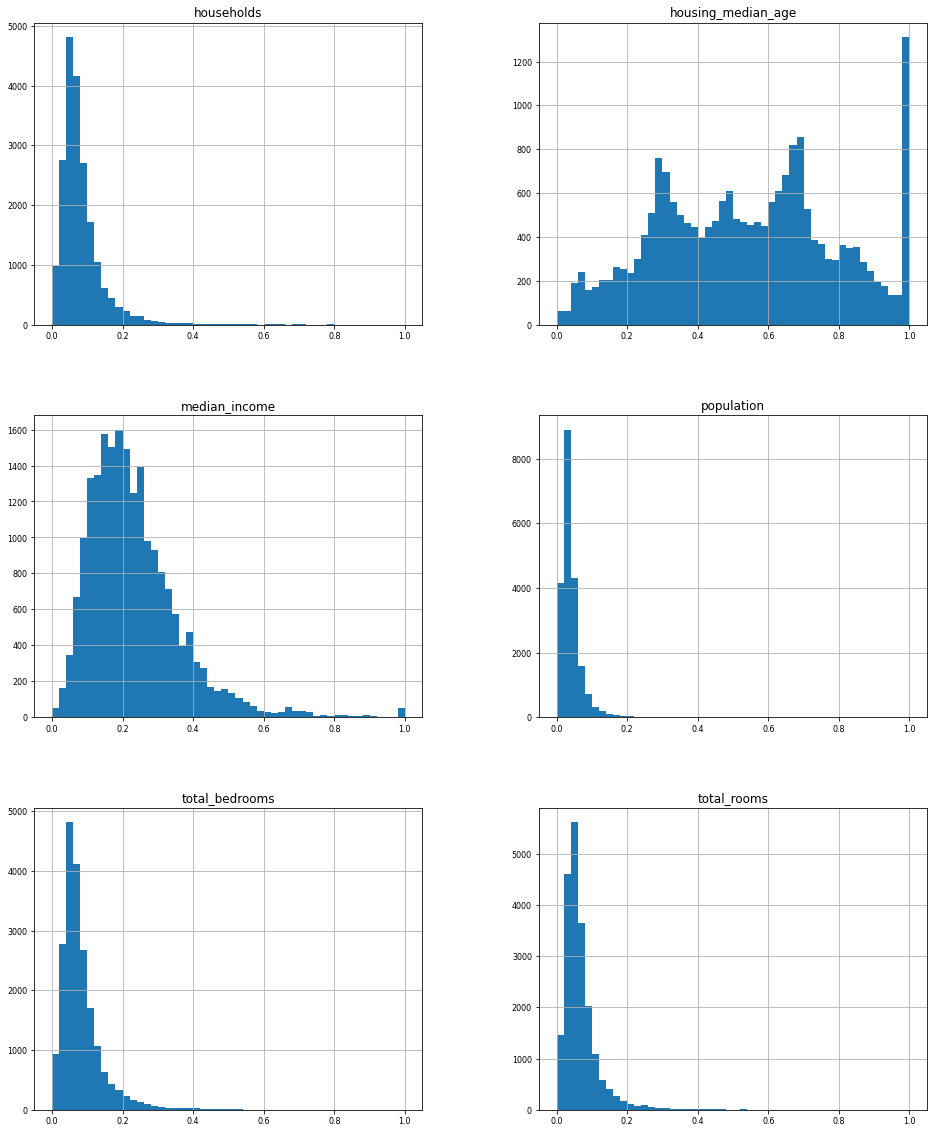

In [ ]:
# Plot a histogram of the DataFrame’s columns
datasetReduced_N.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Standardization

Standardization (or z-score normalization) is the procedure during which the feature values are rescaled so that they have the properties of a standard normal distribution with 𝜇 = 0 and 𝜎 = 1.

In [ ]:
datasetReduced_S = dataset[dataset.columns.difference(['<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN','longitude','latitude','median_house_value'])]
datasetReduced_S.head()

,households,housing_median_age,median_income,population,total_bedrooms,total_rooms
0,126.0,41.0,8.3252,322.0,129.0,880.0
1,1138.0,21.0,8.3014,2401.0,1106.0,7099.0
2,177.0,52.0,7.2574,496.0,190.0,1467.0
3,219.0,52.0,5.6431,558.0,235.0,1274.0
4,259.0,52.0,3.8462,565.0,280.0,1627.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(datasetReduced_S)
datasetReduced_S_Scaled = scaler.transform(datasetReduced_S)

In [ ]:
datasetReduced_S_Scaled.shape

(20433, 6)

In [ ]:
datasetReduced_S[datasetReduced_S.columns]=datasetReduced_S_Scaled
datasetReduced_S.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,households,housing_median_age,median_income,population,total_bedrooms,total_rooms
0,-0.976833,0.982163,2.345163,-0.973320,-0.970325,-0.803813
1,1.670373,-0.606210,2.332632,0.861339,1.348276,2.042130
2,-0.843427,1.855769,1.782939,-0.819769,-0.825561,-0.535189
3,-0.733562,1.855769,0.932970,-0.765056,-0.718768,-0.623510
4,-0.628930,1.855769,-0.013143,-0.758879,-0.611974,-0.461970


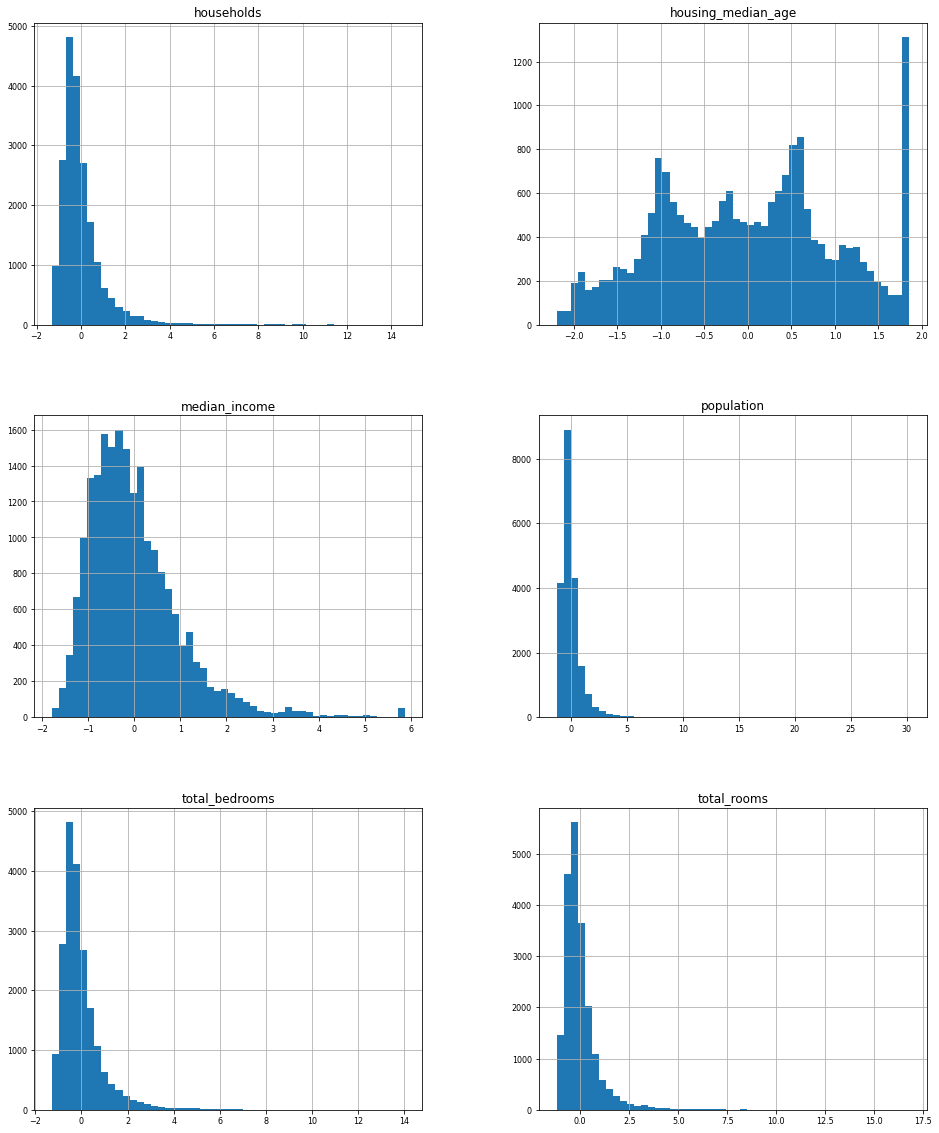

In [ ]:
# Plot a histogram of the DataFrame’s columns
datasetReduced_S.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Binning

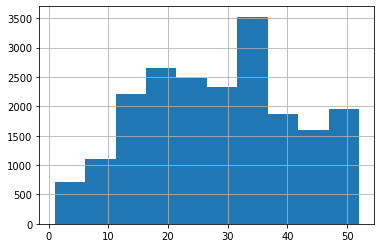

In [ ]:
dataset['housing_median_age'].hist()

Bin continuous data into intervals. [More Info](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=5)
output = est.fit_transform(dataset[['housing_median_age']]).toarray()
print(est.bin_edges_)

[array([ 1., 17., 25., 33., 40., 52.])]


In [ ]:
bins_df=pd.DataFrame(output,columns=est.bin_edges_[0][:-1])
bins_df.head()

,1.0,17.0,25.0,33.0,40.0
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0


In [ ]:
dataset_WithAgeBins = pd.concat([dataset, bins_df], axis=1)
dataset_WithAgeBins.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,1.0,17.0,25.0,33.0,40.0
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
dataset_WithAgeBins.drop(['housing_median_age'], inplace=True, axis=1)
dataset_WithAgeBins.head()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,1.0,17.0,25.0,33.0,40.0
0,-122.23,37.88,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-122.22,37.86,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-122.24,37.85,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-122.25,37.85,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-122.25,37.85,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
